# Exploratory Data Analysis 

## Imports

### Libraries 

In [1]:
# General imports
import numpy as np
import random
import pandas as pd

# System and file management
import os
import zipfile
from glob import glob

# Visualization Tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from skimage.io import imread

# Pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

# DICOM
import pydicom
from pydicom.filereader import dcmread

# jupyter:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

### Functions

In [2]:
# Defining a hypothesis checker function:
def hyp_checker(pvalue):
    alpha = float(input("What's your alpha?"))
    if type(alpha) != float:
        print('Insert a correct alpha')
        return hyp_checker(result)
    else:
        if pvalue <= alpha:
            return "Our p value ({}) is smaller than our alpha({}). H0 is rejected".format(pvalue, alpha)
        else:
            return "Our p value ({}) is bigger than our alpha({}). Fail to reject H0".format(pvalue, alpha)

### Paths

In [3]:
PATH = 'data/' # root
CSV_PATH = os.path.join(PATH,'csv') # folder with csv datasets
DICOM_PATH = os.path.join(PATH, 'pool') # folder containing all of the dicom files
JPG_PATH = os.path.join(PATH, 'pool_jpg') # folder containing all the converted jpg files
DESTINATION_PATH = os.path.join(PATH, 'sorted_balanced') # Folder where the train and test subsets will be located

# Train folder
TRAIN_PATH = os.path.join(DESTINATION_PATH, 'train')
TRAIN_NORMAL_PATH = os.path.join(TRAIN_PATH, 'normal')
TRAIN_NNNP_PATH = os.path.join(TRAIN_PATH, 'nnnp')
TRAIN_PNEUMONIA_PATH = os.path.join(TRAIN_PATH, 'pneumonia')

# Validation folder
VAL_PATH = os.path.join(DESTINATION_PATH, 'validation')
VAL_NORMAL_PATH = os.path.join(VAL_PATH, 'normal')
VAL_NNNP_PATH = os.path.join(VAL_PATH, 'nnnp')
VAL_PNEUMONIA_PATH = os.path.join(VAL_PATH, 'pneumonia')

# Test folder
TEST_PATH = os.path.join(DESTINATION_PATH, 'test')
TEST_NORMAL_PATH = os.path.join(TEST_PATH, 'normal') 
TEST_NNNP_PATH = os.path.join(TEST_PATH, 'nnnp')
TEST_PNEUMONIA_PATH = os.path.join(TEST_PATH, 'pneumonia') 

### CSVs 

In [4]:
labels = pd.read_csv(os.path.join(CSV_PATH, 'cxr_information.csv'))

In [5]:
train_df = pd.read_csv(os.path.join(CSV_PATH,'train_df.csv'))
train_df.shape

(18678, 12)

In [6]:
val_df = pd.read_csv(os.path.join(CSV_PATH,'val_df.csv'))
val_df.shape

(4003, 12)

In [7]:
test_df = pd.read_csv(os.path.join(CSV_PATH,'test_df.csv'))
test_df.shape

(4003, 12)

## EDA 

In [8]:
labels.head()

,patient_id,dcm_file_name,jpg_file_name,type,sex,age,view,target,target_3,type_0,type_1,type_2
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm,0004cfab-14fd-4e49-80ba-63a80b6bddd6.jpg,No Lung Opacity / Not Normal,F,51,PA,0,1,0,1,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,00313ee0-9eaa-42f4-b0ab-c148ed3241cd.dcm,00313ee0-9eaa-42f4-b0ab-c148ed3241cd.jpg,No Lung Opacity / Not Normal,F,48,PA,0,1,0,1,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,00322d4d-1c29-4943-afc9-b6754be640eb.dcm,00322d4d-1c29-4943-afc9-b6754be640eb.jpg,No Lung Opacity / Not Normal,M,19,AP,0,1,0,1,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm,003d8fa0-6bf1-40ed-b54c-ac657f8495c5.jpg,Normal,M,28,PA,0,0,1,0,0
4,00436515-870c-4b36-a041-de91049b9ab4,00436515-870c-4b36-a041-de91049b9ab4.dcm,00436515-870c-4b36-a041-de91049b9ab4.jpg,Lung Opacity,F,32,AP,1,2,0,0,1


In [9]:
labels.shape

(26684, 12)

In [10]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 12 columns):
patient_id       26684 non-null object
dcm_file_name    26684 non-null object
jpg_file_name    26684 non-null object
type             26684 non-null object
sex              26684 non-null object
age              26684 non-null int64
view             26684 non-null object
target           26684 non-null int64
target_3         26684 non-null int64
type_0           26684 non-null int64
type_1           26684 non-null int64
type_2           26684 non-null int64
dtypes: int64(6), object(6)
memory usage: 2.4+ MB


In [11]:
labels.dtypes

patient_id       object
dcm_file_name    object
jpg_file_name    object
type             object
sex              object
age               int64
view             object
target            int64
target_3          int64
type_0            int64
type_1            int64
type_2            int64
dtype: object

**Numerical variables:** 
 - Age - discrete

**Categorical variables:** 
 - patient_id
 - dcm_file_name
 - jpg_file_name
 - type (three types) - both as a categorical column, numerically encoded and one-hot-encoded
 - sex (binary)
 - view (binary)
 - target (binary)

### Numerical variables

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


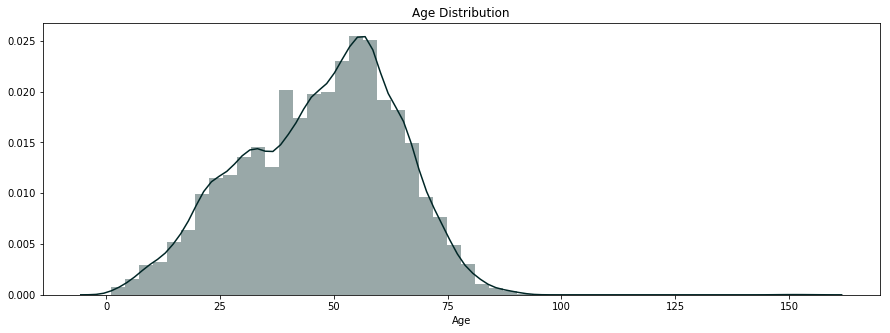

In [12]:
plt.figure(figsize=(15,5))

sns.distplot(labels.age, color='#002626')
plt.xlabel('Age')
plt.title('Age Distribution')

plt.show() 

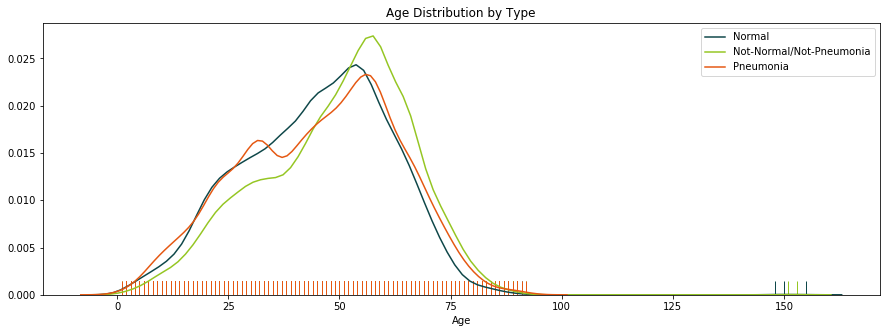

In [13]:
plt.figure(figsize=(15,5))

target_0 = labels.loc[labels.target_3 == 0]
target_1 = labels.loc[labels.target_3 == 1]
target_2 = labels.loc[labels.target_3 == 2]

sns.distplot(target_0.age, hist=False, rug=True, label='Normal', color='#0E4749')
sns.distplot(target_1.age, hist=False, rug=True, label='Not-Normal/Not-Pneumonia', color='#95C623')
sns.distplot(target_2.age, hist=False, rug=True, label='Pneumonia', color='#E55812')

plt.legend()
plt.xlabel('Age')
plt.title('Age Distribution by Type')

plt.show()

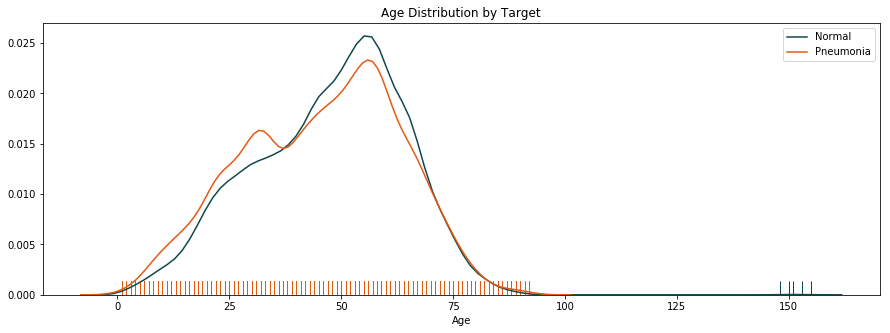

In [14]:
plt.figure(figsize=(15,5))

target_0 = labels.loc[labels.target == 0]
target_1 = labels.loc[labels.target == 1]

sns.distplot(target_0.age, hist=False, rug=True, label='Normal', color='#0E4749')
sns.distplot(target_1.age, hist=False, rug=True, label='Pneumonia', color='#E55812')
plt.legend()
plt.xlabel('Age')
plt.title('Age Distribution by Target')

plt.show()

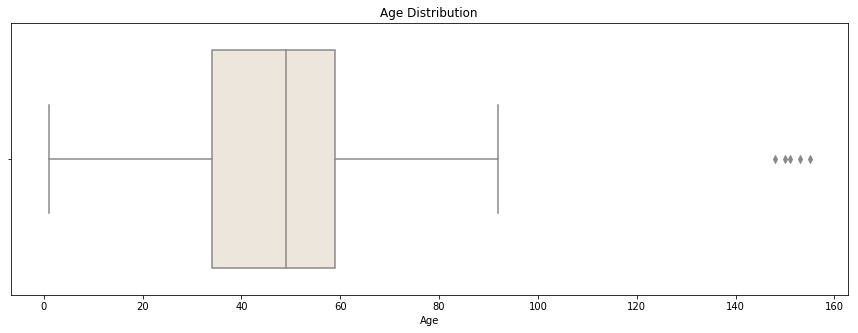

In [15]:
plt.figure(figsize=(15,5))

sns.boxplot(labels.age, color='#EFE7DA')
plt.xlabel('Age')
plt.title('Age Distribution')

plt.show()

The distribution is mainly fenced between logical values of ages, but there are some patients with unusual ages. Let's dig deeper.

In [16]:
labels.loc[labels.age >= 100]

,patient_id,dcm_file_name,jpg_file_name,type,sex,age,view,target,target_3,type_0,type_1,type_2
3175,3b8b8777-a1f6-4384-872a-28b95f59bf0d,3b8b8777-a1f6-4384-872a-28b95f59bf0d.dcm,3b8b8777-a1f6-4384-872a-28b95f59bf0d.jpg,Normal,M,148,PA,0,0,1,0,0
9708,73aeea88-fc48-4030-8564-0a9d7fdecac4,73aeea88-fc48-4030-8564-0a9d7fdecac4.dcm,73aeea88-fc48-4030-8564-0a9d7fdecac4.jpg,No Lung Opacity / Not Normal,F,151,PA,0,1,0,1,0
15273,a4e8e96d-93a6-4251-b617-91382e610fab,a4e8e96d-93a6-4251-b617-91382e610fab.dcm,a4e8e96d-93a6-4251-b617-91382e610fab.jpg,No Lung Opacity / Not Normal,M,153,PA,0,1,0,1,0
23374,ec3697bd-184e-44ba-9688-ff8d5fbf9bbc,ec3697bd-184e-44ba-9688-ff8d5fbf9bbc.dcm,ec3697bd-184e-44ba-9688-ff8d5fbf9bbc.jpg,Normal,M,150,PA,0,0,1,0,0
24537,f632328d-5819-4b29-b54f-adf4934bbee6,f632328d-5819-4b29-b54f-adf4934bbee6.dcm,f632328d-5819-4b29-b54f-adf4934bbee6.jpg,Normal,F,155,PA,0,0,1,0,0


There are only 5 patients with age errors. Let's see the CXR for those subjects.

3175 - 3b8b8777-a1f6-4384-872a-28b95f59bf0d.dcm CXR:


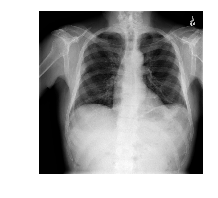

9708 - 73aeea88-fc48-4030-8564-0a9d7fdecac4.dcm CXR:


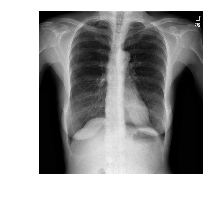

15273 - a4e8e96d-93a6-4251-b617-91382e610fab.dcm CXR:


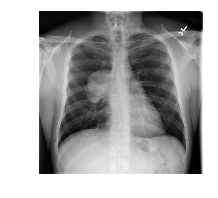

23374 - ec3697bd-184e-44ba-9688-ff8d5fbf9bbc.dcm CXR:


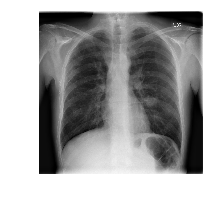

24537 - f632328d-5819-4b29-b54f-adf4934bbee6.dcm CXR:


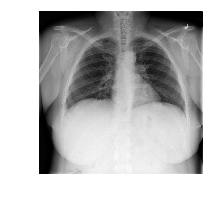

In [17]:
for i,name in zip(labels.dcm_file_name.loc[labels.age >= 100].index, labels.dcm_file_name.loc[labels.age >= 100]):
    print(i,'-', name, 'CXR:')
    fig = plt.figure(figsize=(3,3))
    pix = os.path.join(DICOM_PATH, name)
    d = pydicom.read_file(pix)
    img = d.pixel_array
    plt.imshow(img, cmap=plt.cm.gist_gray)
    plt.axis('Off')
    plt.show()

They correspond to adult individuals. I am going to assume that the error is in the 100, so what I will do is subtract 100 years to those rows.

In [18]:
labels.age = np.where(labels.age < 100, labels.age, labels.age-100)

Plotting the age distribution and boxplot again, now with the corrected outliers.

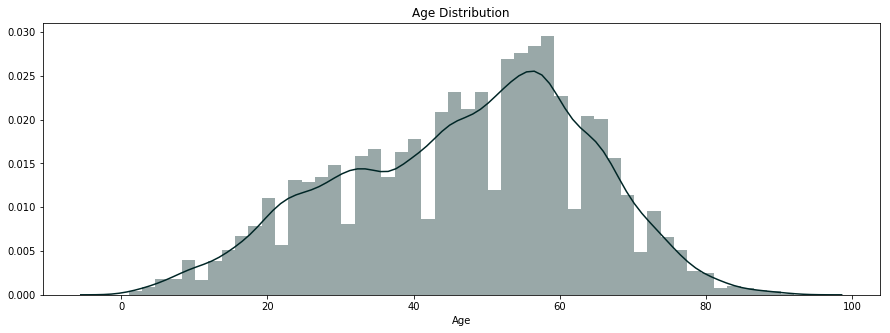

In [19]:
plt.figure(figsize=(15,5))

sns.distplot(labels.age, color='#002626')
plt.xlabel('Age')
plt.title('Age Distribution')

plt.show() 

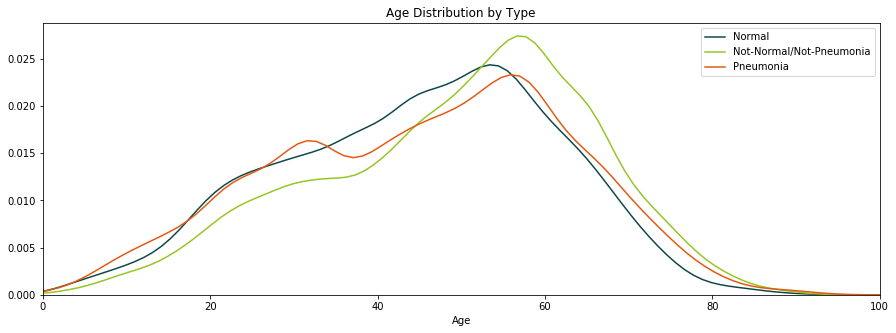

In [20]:
plt.figure(figsize=(15,5))

target_0 = labels.loc[labels.target_3 == 0]
target_1 = labels.loc[labels.target_3 == 1]
target_2 = labels.loc[labels.target_3 == 2]

sns.distplot(target_0.age, hist=False, rug=False, label='Normal', color='#0E4749')
sns.distplot(target_1.age, hist=False, rug=False, label='Not-Normal/Not-Pneumonia', color='#95C623')
sns.distplot(target_2.age, hist=False, rug=False, label='Pneumonia', color='#E55812')
plt.xlim(0,100)
plt.legend()
plt.xlabel('Age')
plt.title('Age Distribution by Type')

plt.show()

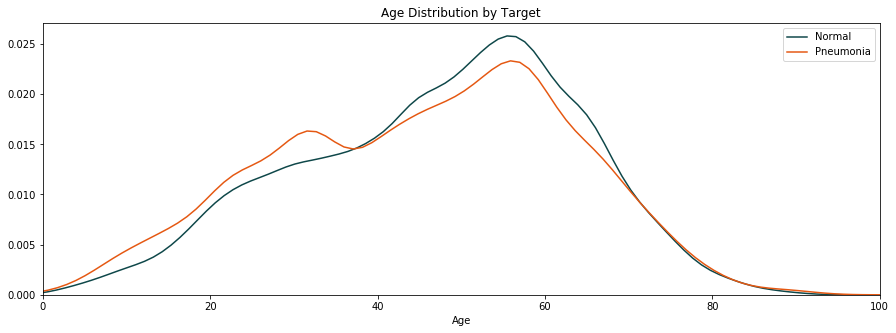

In [21]:
plt.figure(figsize=(15,5))

target_0 = labels.loc[labels.target == 0]
target_1 = labels.loc[labels.target == 1]

sns.distplot(target_0.age, hist=False, rug=False, label='Normal', color='#0E4749')
sns.distplot(target_1.age, hist=False, rug=False, label='Pneumonia', color='#E55812')
plt.xlim(0,100)
plt.legend()
plt.xlabel('Age')
plt.title('Age Distribution by Target')

plt.show()

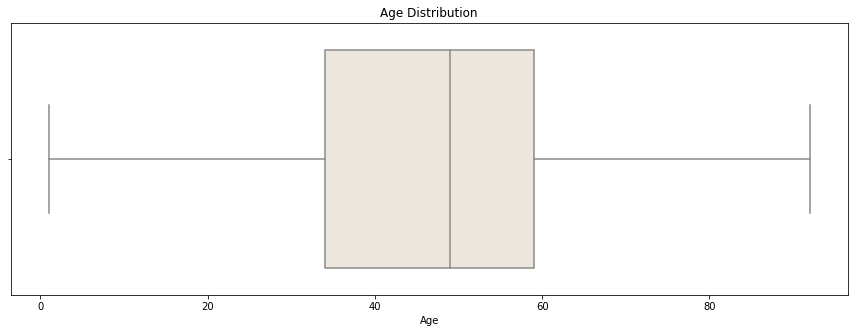

In [22]:
plt.figure(figsize=(15,5))

sns.boxplot(labels.age, color='#EFE7DA')
plt.xlabel('Age')
plt.title('Age Distribution')

plt.show()

In [23]:
np.quantile(labels.age, 0.25)

34.0

In [24]:
np.quantile(labels.age, 0.50)

49.0

In [25]:
np.quantile(labels.age, 0.75)

59.0

In [26]:
labels.describe().T.head(1)

,count,mean,std,min,25%,50%,75%,max
age,26684.0,47.01128,16.749853,1.0,34.0,49.0,59.0,92.0


#### Grouping by target (pneumonia vs. normal)

In [27]:
labels_stats = labels[['age', 'target']].groupby('target', as_index=True).agg({'age':['mean','std']})
# Flattening columns:
labels_stats.columns = labels_stats.columns.map('|'.join).str.strip('|')
labels_stats

,age|mean,age|std
target,,
0,47.426809,16.512130
1,45.582502,17.468836


Let's check if that difference is statistically significant:

In [28]:
# H0 Mean(target=0) = Mean(target=0)
# H1 Mean(target=0) != Mean(target=0)
# Samples not matched. Unequal variances. So we use Welch's t-test.

In [29]:
from scipy.stats import ttest_ind
normal = labels.age.loc[labels.target == 0]
pneumonia = labels.age.loc[labels.target == 1]
result = ttest_ind(normal, pneumonia, equal_var=False)
result

Ttest_indResult(statistic=7.293236064535561, pvalue=3.271837211303338e-13)

In [30]:
hyp_checker(result[1])

What's your alpha?0.05


'Our p value (3.271837211303338e-13) is smaller than our alpha(0.05). H0 is rejected'

#### Grouping by type (pneumonia/nnnp/normal)

In [31]:
labels_stats = labels[['age', 'target_3']].groupby('target_3', as_index=True).agg({'age':['mean','std']})
# Flattening columns:
labels_stats.columns = labels_stats.columns.map('|'.join).str.strip('|')
labels_stats

,age|mean,age|std
target_3,,
0,44.903175,16.274558
1,49.316386,16.436718
2,45.582502,17.468836


Let's check if that difference is statistically significant:

In [32]:
labels.target_3.unique()

array([1, 0, 2])

In [33]:
age_by_target = []

for targetclass in labels.target_3.unique():
    age = labels.age.loc[labels.target_3 == targetclass]
    age_by_target.append(age)

In [34]:
# H0: the different types (normal, not-normal/not-pneumonia, pneumonia) have the same population mean.
# H1: the different types (normal, not-normal/not-pneumonia, pneumonia) have different populations means.

In [35]:
from scipy.stats import f_oneway
result = f_oneway(*age_by_target)
result

F_onewayResult(statistic=207.0626986600755, pvalue=5.815171095187834e-90)

In [36]:
hyp_checker(result[1])

What's your alpha?0.05


'Our p value (5.815171095187834e-90) is smaller than our alpha(0.05). H0 is rejected'

Age mean is around 47 years old with a minimum age of 1 and a maximum of 92. We have achieved a fenced distribution with no outliers.
    - p25: 34 years
    - p50 (median): 49 years
    - p75: 59 years

### Categorial Variables 

#### Study of our possible target variables: target and type: 

In [37]:
labels.target.value_counts()

0    20672
1     6012
Name: target, dtype: int64

In [38]:
labels.target_3.value_counts()

1    11821
0     8851
2     6012
Name: target_3, dtype: int64

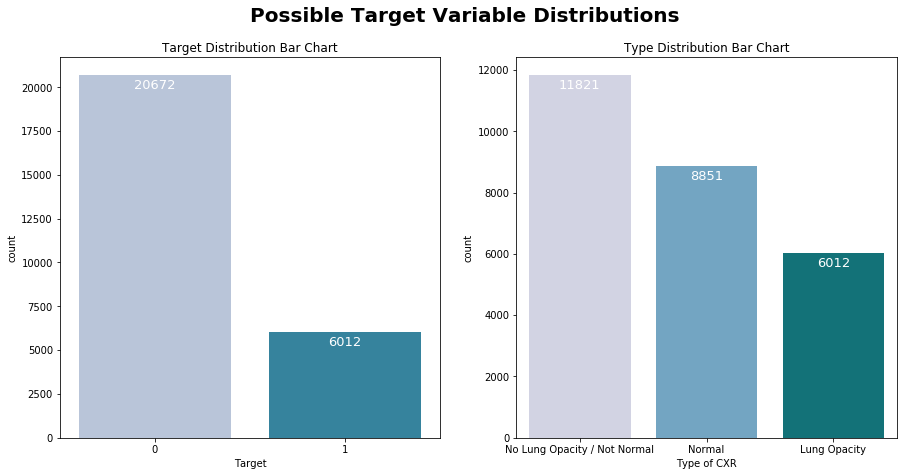

In [39]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,7))
fig.suptitle('Possible Target Variable Distributions', fontsize=20, fontweight=800)

plt.sca(ax1)
# Plotting:
p1 = sns.countplot('target', data=labels, palette='PuBuGn')

# Showing the numerical values of each bar:
for p in p1.patches:
    p1.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, -10), 
                textcoords = 'offset points', 
                fontsize=13,
                fontweight=500,
                color='white')
    
# Adding labels and titles:
plt.xlabel('Target')
plt.title('Target Distribution' + ' Bar Chart')


plt.sca(ax2)
# Plotting:
p2 = sns.countplot('type', data=labels, palette='PuBuGn')

# Showing the numerical values of each bar:
for p in p2.patches:
    p2.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, -10), 
                textcoords = 'offset points', 
                fontsize=13,
                fontweight=500,
                color='white')

# Adding labels and titles:
plt.xlabel('Type of CXR')
plt.title('Type Distribution' + ' Bar Chart')

plt.show() 

As we can see, the target variable is quite unbalanced. 
Two solutions that can be tried are the following:
    - Comparing just between strictly normal and Lung Opacity CXRs, classes would still be unbalanced, but not as much.
    - Turning the problem intro a multi classification one with three classes (types).

#### Sex 

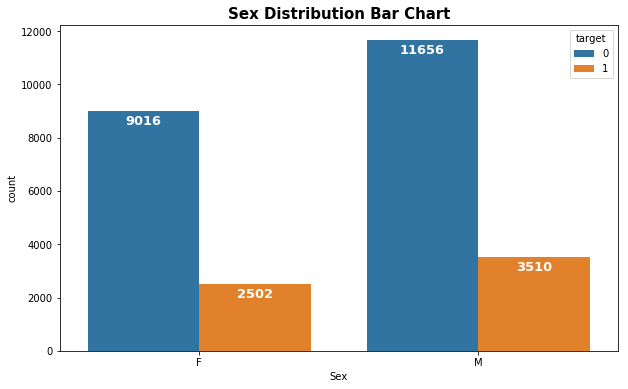

In [40]:
plt.figure(figsize=(10,6))

sex_bar = sns.countplot('sex', data=labels, hue='target')
for p in sex_bar.patches:
    sex_bar.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, -10), 
                textcoords = 'offset points', 
                fontsize=13,
                fontweight=800, 
                color='white')
plt.xlabel('Sex')
plt.title('Sex Distribution' + ' Bar Chart', fontsize=15, fontweight=700)

plt.show() 

#### View

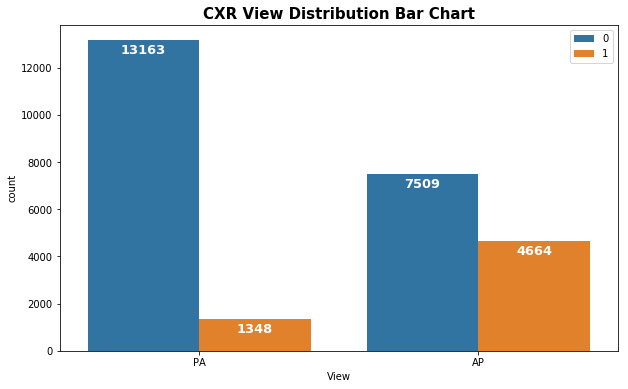

In [41]:
plt.figure(figsize=(10,6))

view_bar = sns.countplot('view', data=labels, hue='target')
for p in view_bar.patches:
    view_bar.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, -10), 
                textcoords = 'offset points', 
                fontsize=13,
                fontweight=800, 
                color='white')
plt.legend(loc=0)
plt.xlabel('View')
plt.title('CXR View Distribution' + ' Bar Chart', fontsize=15, fontweight=700)

plt.show() 

**PA:** postero-anterior.

**AP:** antero-posterior.

## Displaying sample images 

In [42]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

### Normal (target=0) CXRs

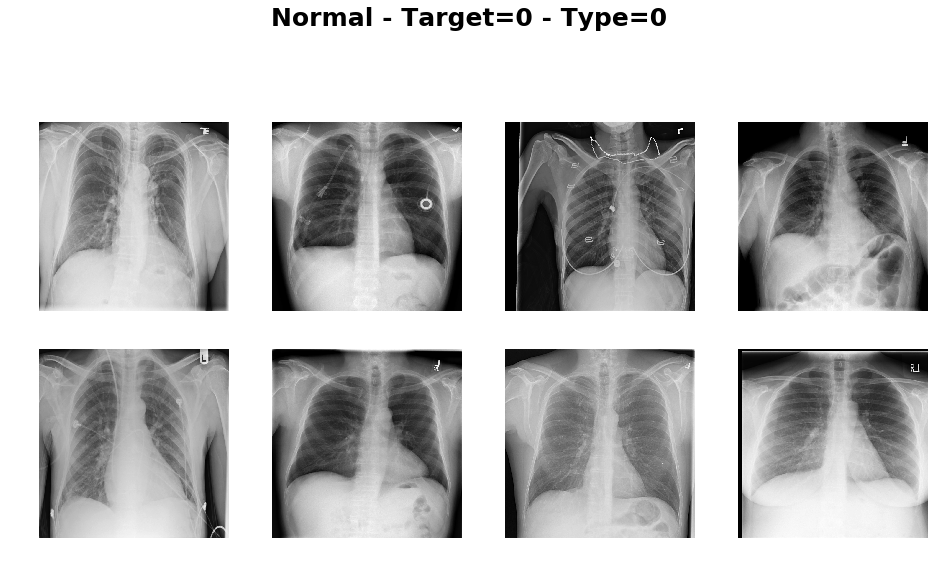

In [43]:
pic_index += 8
next_normal_pix = [os.path.join(TRAIN_NORMAL_PATH, fname) 
                   for fname in os.listdir(TRAIN_NORMAL_PATH)[pic_index-8:pic_index]]

fig = plt.figure(figsize=(25,25))
fig.set_size_inches(ncols * 4, nrows * 4)
fig.suptitle('Normal - Target=0 - Type=0', fontsize=25, fontweight=800)
for i, img_path in enumerate(next_normal_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap=plt.cm.gist_gray)
plt.show()

### Pneumonia (target=1) CXRs 

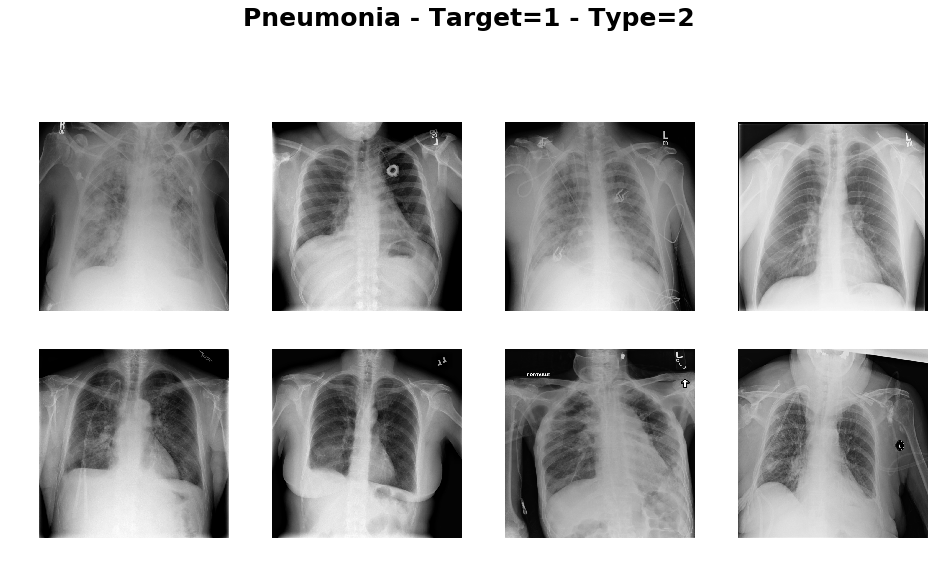

In [44]:
pic_index += 8
next_pneumonia_pix = [os.path.join(TRAIN_PNEUMONIA_PATH, fname) 
                      for fname in os.listdir(TRAIN_PNEUMONIA_PATH)[pic_index-8:pic_index]]

fig = plt.figure(figsize=(25,25))
fig.set_size_inches(ncols * 4, nrows * 4)
fig.suptitle('Pneumonia - Target=1 - Type=2', fontsize=25, fontweight=800)
for i, img_path in enumerate(next_pneumonia_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap=plt.cm.gist_gray)
plt.show()